# Linear Regression

In statistics, linear regression is a linear approach to modeling the relationship between a scalar response and one or more explanatory variables.
Linear regression is fitting a line to represent set of obeservations.

To perform this, we use method called least squares or Ordinary least squares (OLS).  

    By the principle of least squares: minimizing the sum of the squares of the differences between the 
    observed dependent variable (values of the variable being predicted) in the given dataset and those 
    predicted by the linear function.
    
    For the equation of slope intercept of the line, `y = mx + b`
                
                 (corelation between two variables) X (standard deviation of x)
    slope `m` = --------------------------------------------------------------
                                     (standard deviation of y)

### Enough Explanation, lets learn by example!

firstly we will fabricate some data that shows a roguhly linear relationship between amount spent on marketing  of a product and its respective sales.

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

%matplotlib inline

datapoints = 40

marketing = np.linspace(50, 50000, datapoints)[:, np.newaxis]
sales = np.sin(marketing) + 0.1*np.power(marketing,2) + 0.5*np.random.randn(datapoints,1)
print(marketing.shape)
print(sales.shape)

(40, 1)
(40, 1)


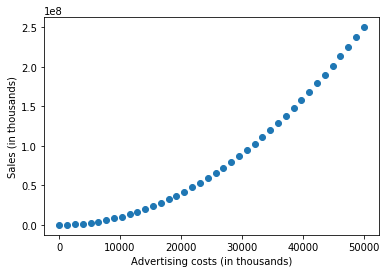

In [2]:
plt.scatter(marketing, sales)
plt.xlabel('Advertising costs (in thousands)')
plt.ylabel('Sales (in thousands)')
plt.show()

As 'advertising_cost' and 'sales' are numpy array, they are represented as list of lists containing single value.
see following output to understand better.

In [3]:
print(marketing)

[[   50.        ]
 [ 1330.76923077]
 [ 2611.53846154]
 [ 3892.30769231]
 [ 5173.07692308]
 [ 6453.84615385]
 [ 7734.61538462]
 [ 9015.38461538]
 [10296.15384615]
 [11576.92307692]
 [12857.69230769]
 [14138.46153846]
 [15419.23076923]
 [16700.        ]
 [17980.76923077]
 [19261.53846154]
 [20542.30769231]
 [21823.07692308]
 [23103.84615385]
 [24384.61538462]
 [25665.38461538]
 [26946.15384615]
 [28226.92307692]
 [29507.69230769]
 [30788.46153846]
 [32069.23076923]
 [33350.        ]
 [34630.76923077]
 [35911.53846154]
 [37192.30769231]
 [38473.07692308]
 [39753.84615385]
 [41034.61538462]
 [42315.38461538]
 [43596.15384615]
 [44876.92307692]
 [46157.69230769]
 [47438.46153846]
 [48719.23076923]
 [50000.        ]]


We need to convert the list of lists into a single list. Here's how we do it.

In [4]:
marketing = marketing[:,0]
sales = sales[:,0]

    Now we will print the 'advertising_cost' data again to see the difference

In [5]:
print(marketing)

[   50.          1330.76923077  2611.53846154  3892.30769231
  5173.07692308  6453.84615385  7734.61538462  9015.38461538
 10296.15384615 11576.92307692 12857.69230769 14138.46153846
 15419.23076923 16700.         17980.76923077 19261.53846154
 20542.30769231 21823.07692308 23103.84615385 24384.61538462
 25665.38461538 26946.15384615 28226.92307692 29507.69230769
 30788.46153846 32069.23076923 33350.         34630.76923077
 35911.53846154 37192.30769231 38473.07692308 39753.84615385
 41034.61538462 42315.38461538 43596.15384615 44876.92307692
 46157.69230769 47438.46153846 48719.23076923 50000.        ]


### Now that our data is ready, we will perform Linear Regression using scipy.stats

In [6]:
from scipy import stats

slope, intercept, r_value, v_value, std_error = stats.linregress(marketing, sales)

### To verify the fit of the regression model we will calulate ` r_squared = r_value ^ 2 `

    R-squared is a handy, seemingly intuitive measure of how well your linear model fits a set of observations.

    The closer the value of R-squared (represented further as r_squared), the better fit is the resultant regression model.

In [7]:
r_squared = r_value**2
print(r_squared)

0.9348636390412326


## Now lets use slope and intercept values generated from regression to plot predicted and observed lines:

1. define predict function to determine value of sales based on advertising_costs
2. generate the array for predicted model results to represent model prediction line
3. plot both subplots together

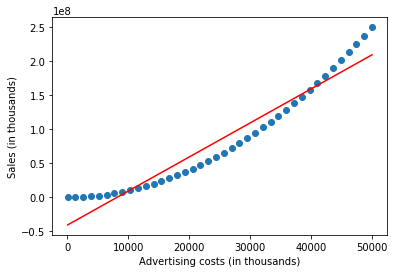

In [8]:
def predict(x):
    return slope * x + intercept

predicted_line = predict(marketing)

plt.scatter(marketing, sales)
plt.plot(marketing, predicted_line, c='r') # assigning separeate color 


plt.xlabel('Advertising costs (in thousands)')
plt.ylabel('Sales (in thousands)')

plt.show()

## Lets make another regeression against normally distributed data

In [9]:
marketing = np.random.normal(5000, 300, 100)
sales = 100 - (marketing + np.random.normal(5000, 1.5, 100)) * 2

Here, data is not in the 'list of lists' representation, but is simply list of data points

In [10]:
print(marketing)

[4528.78820028 4921.5024936  4778.69221445 4872.07327048 5258.65779142
 5231.0864194  5074.84666601 4988.14230603 4713.05289133 5174.11590227
 5130.1825533  5056.61303806 5055.1946669  4462.63991622 4709.0861834
 5129.15686571 4916.10780102 4668.49695389 4479.94514244 5259.39254747
 5475.75289502 4973.01803008 4946.92602757 5009.70710369 5050.39805224
 4549.97807492 4778.03863474 4831.36347888 5070.39995365 4717.24749416
 4680.41821516 5129.42070118 5210.71021105 4903.07797563 4662.81221087
 5064.00647004 5224.06596546 5291.56511993 4956.38558068 5425.29921889
 4567.20314443 5251.05410739 4907.42060664 5019.02307665 4967.25169417
 5354.18476763 4887.05435293 5550.32148886 5093.98545992 4934.70658139
 5080.32820444 5294.90615733 4960.62627959 4889.25019786 5035.33574853
 5384.81370623 4610.75141575 4548.75514765 4843.24640866 4747.29096365
 5188.72856452 4986.35576343 4953.41312302 4848.22463391 4978.66861765
 4983.79598501 4917.79573568 4763.21774896 5090.04230354 5164.21288729
 5075.0

### Lets calculate out regression model and verify the

In [11]:
slope, intercept, r_value, v_value, std_error = stats.linregress(marketing, sales)

#verifying the fit using R-squared method
r_squared = r_value**2
print(r_squared)

0.9999660452291965


#### Now lets plot the graph!

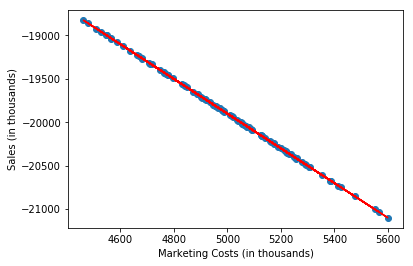

In [12]:
predicted_line = predict(marketing)

plt.scatter(marketing, sales)
plt.plot(marketing, predicted_line, c='r') # assigning separeate color 


plt.xlabel('Marketing Costs (in thousands)')
plt.ylabel('Sales (in thousands)')

plt.show()